In [1]:
# %matplotlib notebook

In [2]:
 # Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
from functools import reduce
from scipy import stats

In [3]:
# read csv files
player_data_18 = pd.read_csv('data/player_data2018.csv')
player_data_17 = pd.read_csv('data/player_data2017.csv')
player_data_16 = pd.read_csv('data/player_data2016.csv')
player_data_15 = pd.read_csv('data/player_data2015.csv')
player_data_14 = pd.read_csv('data/player_data2014.csv')
player_data_18.head()

,Rk,Player,Tm,FantPos,Age,Games,GS,PassCmp,PassAtt,PassYds,...,TotalTD,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
0,1,Todd Gurley*+\GurlTo01,LAR,RB,24,14,14,0,0,0,...,21,3.0,NaN,313.0,372.1,379.1,342.6,178.0,1,1.0
1,2,Saquon Barkley*\BarkSa00,NYG,RB,21,16,16,0,0,0,...,15,1.0,NaN,295.0,385.8,391.8,340.3,159.0,2,2.0
2,3,Christian McCaffrey\McCaCh01,CAR,RB,22,16,16,1,1,50,...,13,NaN,NaN,279.0,385.5,392.5,332.0,143.0,3,3.0
3,4,Alvin Kamara*\KamaAl00,NOR,RB,23,15,13,0,0,0,...,18,3.0,NaN,273.0,354.2,360.2,313.7,138.0,4,4.0
4,5,Patrick Mahomes*+\MahoPa00,KAN,QB,23,16,16,383,580,5097,...,2,1.0,NaN,417.0,417.1,437.1,429.1,134.0,1,5.0


### Clean data

In [4]:
player_data_18['Player'] = player_data_18['Player'].str.split('*').str.get(0)
player_data_17['Player'] = player_data_17['Player'].str.split('*').str.get(0)
player_data_16['Player'] = player_data_16['Player'].str.split('*').str.get(0)
player_data_15['Player'] = player_data_15['Player'].str.split('*').str.get(0)
player_data_14['Player'] = player_data_14['Player'].str.split('*').str.get(0)

In [5]:
player_data_18['Player'] = player_data_18['Player'].str.split(r'\\').str.get(0)
player_data_17['Player'] = player_data_17['Player'].str.split(r'\\').str.get(0)
player_data_16['Player'] = player_data_16['Player'].str.split(r'\\').str.get(0)
player_data_15['Player'] = player_data_15['Player'].str.split(r'\\').str.get(0)
player_data_14['Player'] = player_data_14['Player'].str.split(r'\\').str.get(0)

In [6]:
# list(player_data_18)

In [7]:
# create new ppr dataframes by year before merging

ppr_14 = pd.DataFrame(player_data_14[['Player','PassYds','PassTD','Int','RushAtt','RushYds','RushTD','Tgt','Rec',
                                      'RecYds','RecTD','FL','TotalTD','PPR','PosRank','OvRank']])

ppr_15 = pd.DataFrame(player_data_15[['Player','PassYds','PassTD','Int','RushAtt','RushYds','RushTD','Tgt','Rec',
                                      'RecYds','RecTD','FL','TotalTD','PPR','PosRank','OvRank']])

ppr_16 = pd.DataFrame(player_data_16[['Player','PassYds','PassTD','Int','RushAtt','RushYds','RushTD','Tgt','Rec',
                                      'RecYds','RecTD','FL','TotalTD','PPR','PosRank','OvRank']])

ppr_17 = pd.DataFrame(player_data_17[['Player','PassYds','PassTD','Int','RushAtt','RushYds','RushTD','Tgt','Rec',
                                      'RecYds','RecTD','FL','TotalTD','PPR','PosRank','OvRank']])

ppr_18 = pd.DataFrame(player_data_18[['Player','PassYds','PassTD','Int','RushAtt','RushYds','RushTD','Tgt','Rec',
                                      'RecYds','RecTD','FL','TotalTD','PPR','PosRank','OvRank']])

In [8]:
# merge 2014 and 2015 player data 

combined_ppr = pd.merge(ppr_14,ppr_15,how='outer',on='Player')
combined_ppr.head()

,Player,PassYds_x,PassTD_x,Int_x,RushAtt_x,RushYds_x,RushTD_x,Tgt_x,Rec_x,RecYds_x,...,RushTD_y,Tgt_y,Rec_y,RecYds_y,RecTD_y,FL_y,TotalTD_y,PPR_y,PosRank_y,OvRank_y
0,DeMarco Murray,0.0,0.0,0.0,392.0,1845.0,13.0,64.0,57.0,416.0,...,6.0,55.0,44.0,322.0,1.0,2.0,7.0,184.4,18.0,55.0
1,Le'Veon Bell,0.0,0.0,0.0,290.0,1361.0,8.0,105.0,83.0,854.0,...,3.0,26.0,24.0,136.0,0.0,0.0,3.0,111.2,45.0,NaN
2,Marshawn Lynch,0.0,0.0,0.0,280.0,1306.0,13.0,48.0,37.0,367.0,...,3.0,21.0,13.0,80.0,0.0,0.0,3.0,82.7,55.0,NaN
3,Antonio Brown,20.0,1.0,0.0,4.0,13.0,0.0,181.0,129.0,1698.0,...,0.0,193.0,136.0,1834.0,10.0,2.0,11.0,388.2,1.0,1.0
4,Matt Forte,0.0,0.0,0.0,266.0,1038.0,6.0,130.0,102.0,808.0,...,4.0,58.0,44.0,389.0,3.0,1.0,7.0,214.7,8.0,25.0


In [9]:
# rename columns to reflect year 

combined_ppr = combined_ppr.rename(columns={'PassYds_x':'passYds2014','PassTD_x':'passTD2014','Int_x':'int2014',
                                   'RushAtt_x':'rushAtt2014','RushYds_x':'rushYds2014','RushTD_x':'rushTD2014','Tgt_x':'tgt2014',
                                   'Rec_x':'rec2014','RecYds_x':'recYds2014','RecTD_x':'recTD2014','FL_x':'FL2014',
                                   'TotalTD_x':'totalTD2014','PPR_x':'PPR2014','PosRank_x':'posRank2014','OvRank_x':'ovRank2014'})

combined_ppr = combined_ppr.rename(columns={'PassYds_y':'passYds2015','PassTD_y':'passTD2015','Int_y':'int2015',
                                   'RushAtt_y':'rushAtt2015','RushYds_y':'rushYds2015','RushTD_y':'rushTD2015','Tgt_y':'tgt2015',
                                   'Rec_y':'rec2015','RecYds_y':'recYds2015','RecTD_y':'recTD2015','FL_y':'FL2015',
                                   'TotalTD_y':'totalTD2015','PPR_y':'PPR2015','PosRank_y':'posRank2015','OvRank_y':'ovRank2015'})

combined_ppr.head()

,Player,passYds2014,passTD2014,int2014,rushAtt2014,rushYds2014,rushTD2014,tgt2014,rec2014,recYds2014,...,rushTD2015,tgt2015,rec2015,recYds2015,recTD2015,FL2015,totalTD2015,PPR2015,posRank2015,ovRank2015
0,DeMarco Murray,0.0,0.0,0.0,392.0,1845.0,13.0,64.0,57.0,416.0,...,6.0,55.0,44.0,322.0,1.0,2.0,7.0,184.4,18.0,55.0
1,Le'Veon Bell,0.0,0.0,0.0,290.0,1361.0,8.0,105.0,83.0,854.0,...,3.0,26.0,24.0,136.0,0.0,0.0,3.0,111.2,45.0,NaN
2,Marshawn Lynch,0.0,0.0,0.0,280.0,1306.0,13.0,48.0,37.0,367.0,...,3.0,21.0,13.0,80.0,0.0,0.0,3.0,82.7,55.0,NaN
3,Antonio Brown,20.0,1.0,0.0,4.0,13.0,0.0,181.0,129.0,1698.0,...,0.0,193.0,136.0,1834.0,10.0,2.0,11.0,388.2,1.0,1.0
4,Matt Forte,0.0,0.0,0.0,266.0,1038.0,6.0,130.0,102.0,808.0,...,4.0,58.0,44.0,389.0,3.0,1.0,7.0,214.7,8.0,25.0


In [10]:
combined_ppr = pd.merge(combined_ppr,ppr_16,how='outer',on='Player')
combined_ppr.head()

,Player,passYds2014,passTD2014,int2014,rushAtt2014,rushYds2014,rushTD2014,tgt2014,rec2014,recYds2014,...,RushTD,Tgt,Rec,RecYds,RecTD,FL,TotalTD,PPR,PosRank,OvRank
0,DeMarco Murray,0.0,0.0,0.0,392.0,1845.0,13.0,64.0,57.0,416.0,...,9.0,67.0,53.0,377.0,3.0,1.0,12.0,293.8,4.0,5.0
1,Le'Veon Bell,0.0,0.0,0.0,290.0,1361.0,8.0,105.0,83.0,854.0,...,7.0,94.0,75.0,616.0,2.0,1.0,9.0,317.4,5.0,6.0
2,Marshawn Lynch,0.0,0.0,0.0,280.0,1306.0,13.0,48.0,37.0,367.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Antonio Brown,20.0,1.0,0.0,4.0,13.0,0.0,181.0,129.0,1698.0,...,0.0,154.0,106.0,1284.0,12.0,0.0,12.0,307.3,3.0,12.0
4,Matt Forte,0.0,0.0,0.0,266.0,1038.0,6.0,130.0,102.0,808.0,...,7.0,43.0,30.0,263.0,1.0,1.0,8.0,183.6,21.0,47.0


In [11]:
combined_ppr = combined_ppr.rename(columns={'PassYds':'passYds2016','PassTD':'passTD2016','Int':'int2016',
                                   'RushAtt':'rushAtt2016','RushYds':'rushYds2016','RushTD':'rushTD2016','Tgt':'tgt2016',
                                   'Rec':'rec2016','RecYds':'recYds2016','RecTD':'recTD2016','FL':'FL2016',
                                   'TotalTD':'totalTD2016','PPR':'PPR2016','PosRank':'posRank2016','OvRank':'ovRank2016'})

In [12]:
combined_ppr = pd.merge(combined_ppr,ppr_17,how='outer',on='Player')

In [13]:
combined_ppr = combined_ppr.rename(columns={'PassYds':'passYds2017','PassTD':'passTD2017','Int':'int2017',
                                   'RushAtt':'rushAtt2017','RushYds':'rushYds2017','RushTD':'rushTD2017','Tgt':'tgt2017',
                                   'Rec':'rec2017','RecYds':'recYds2017','RecTD':'recTD2017','FL':'FL2017',
                                   'TotalTD':'totalTD2017','PPR':'PPR2017','PosRank':'posRank2017','OvRank':'ovRank2017'})

In [14]:
combined_ppr = pd.merge(combined_ppr,ppr_18,how='outer',on='Player')

In [15]:
combined_ppr = combined_ppr.rename(columns={'PassYds':'passYds2018','PassTD':'passTD2018','Int':'int2018',
                                   'RushAtt':'rushAtt2018','RushYds':'rushYds2018','RushTD':'rushTD2018','Tgt':'tgt2018',
                                   'Rec':'rec2018','RecYds':'recYds2018','RecTD':'recTD2018','FL':'FL2018',
                                   'TotalTD':'totalTD2018','PPR':'PPR2018','PosRank':'posRank2018','OvRank':'ovRank2018'})

In [16]:
combined_ppr = combined_ppr.fillna(0)

In [17]:
combined_ppr = combined_ppr.set_index('Player')
combined_ppr.head()

,passYds2014,passTD2014,int2014,rushAtt2014,rushYds2014,rushTD2014,tgt2014,rec2014,recYds2014,recTD2014,...,rushTD2018,tgt2018,rec2018,recYds2018,recTD2018,FL2018,totalTD2018,PPR2018,posRank2018,ovRank2018
Player,,,,,,,,,,,,,,,,,,,,,
DeMarco Murray,0.0,0.0,0.0,392.0,1845.0,13.0,64.0,57.0,416.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Le'Veon Bell,0.0,0.0,0.0,290.0,1361.0,8.0,105.0,83.0,854.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Marshawn Lynch,0.0,0.0,0.0,280.0,1306.0,13.0,48.0,37.0,367.0,4.0,...,3.0,20.0,15.0,84.0,0.0,0.0,3.0,79.0,56.0,0.0
Antonio Brown,20.0,1.0,0.0,4.0,13.0,0.0,181.0,129.0,1698.0,13.0,...,0.0,168.0,104.0,1297.0,15.0,0.0,15.0,323.7,2.0,9.0
Matt Forte,0.0,0.0,0.0,266.0,1038.0,6.0,130.0,102.0,808.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# save combined 2014 - 2018 player dataframe into csv file
combined_ppr.to_csv('data/combined_player_data.csv')

   ## Chart Player PPR points over time

In [92]:
player = input('What player would you like to see? ')

What player would you like to see? Cooper Kupp


In [93]:
ppr_points = combined_ppr.loc[player,['PPR2014','PPR2015','PPR2016','PPR2017','PPR2018']].astype(float)
years = [2014,2015,2016,2017,2018]
x_axis = np.arange(0,5,1)

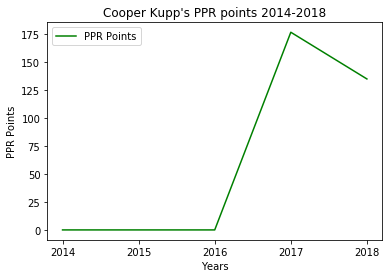

In [94]:
plt.plot(years,ppr_points,color='green',label='PPR Points')

plt.xticks(years)
plt.legend(loc='best')
plt.title(player + "'s PPR points 2014-2018")
plt.xlabel('Years')
plt.ylabel('PPR Points')

plt.show()

In [95]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, ppr_points)
fit = slope * x_axis + intercept

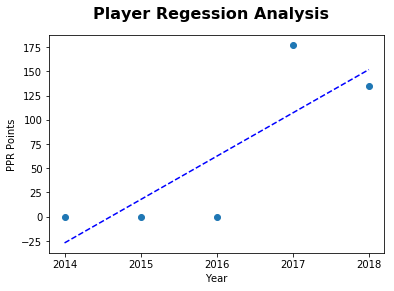

In [96]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Player Regession Analysis", fontsize=16, fontweight="bold")

plt.xticks(np.arange(5), ('2014', '2015', '2016', '2017', '2018'))
# ax.set_xlim(0, 5)
# ax.set_ylim(0, 5)

ax.set_xlabel("Year")
ax.set_ylabel("PPR Points")

ax.plot(x_axis, ppr_points, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

### Create attempts vs total fantasy points scatter plot

In [ ]:
# set x-axis

rushatt = (combined_ppr.loc[player,['rushAtt2014','rushAtt2015','rushAtt2016','rushAtt2017','rushAtt2018']])

targets = (combined_ppr.loc[player,['tgt2014','tgt2015','tgt2016','tgt2017','tgt2018']])

attempts = 
# rushatt
# targets
attempts

In [ ]:
attempts.count()

In [ ]:
# set y-axis
pprpoints = (combined_ppr.loc[player,['PPR2014','PPR2015','PPR2016','PPR2017','PPR2018']])
# pprpoints

In [ ]:
# list(player_data_18)
# player_data_18.head()

In [ ]:
(slope, intercept, _, _, _) = linregress(attempts, pprpoints)
fit = slope * attempts + intercept

In [ ]:
plt.title(f"{player} Attempts vs Total Fantasy Points")
plt.ylabel("Total Points")
plt.xlabel("Attempts")
plt.legend()
plt.scatter(attempts,pprpoints, marker="o", facecolors="red", edgecolors="black")
plt.plot(attempts, fit, 'b--')

# plt.savefig("attempts_vs_totalpoints")
plt.show()